In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.graphics as smg
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Q2

To prepare a prediction model for predicting Price of the car with just the following column features


Corolla< Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [2]:
df=pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')

<span style='color:royalblue'>The unicode_escape encoding is commonly used to encode Unicode strings for storage or transmission in contexts 
where only ASCII characters are allowed

In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### Checking for columns

In [4]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
df1=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
df1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
df2=df1.rename({'Age_08_04':'age','Quarterly_Tax':'Qtax'},axis=1)

In [8]:
df2.head()

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Qtax    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [10]:
df2[df2.duplicated(keep=False)]

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
112,24950,8,13253,116,2000,5,5,234,1320
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
df3=df2.drop_duplicates()

In [12]:
df3.shape

(1435, 9)

### <span style='color:green'> Correlation matrix

In [13]:
df3.corr()

,Price,age,KM,HP,cc,Doors,Gears,Qtax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Qtax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


### <span style='color:green'> Scatterplot between the variables

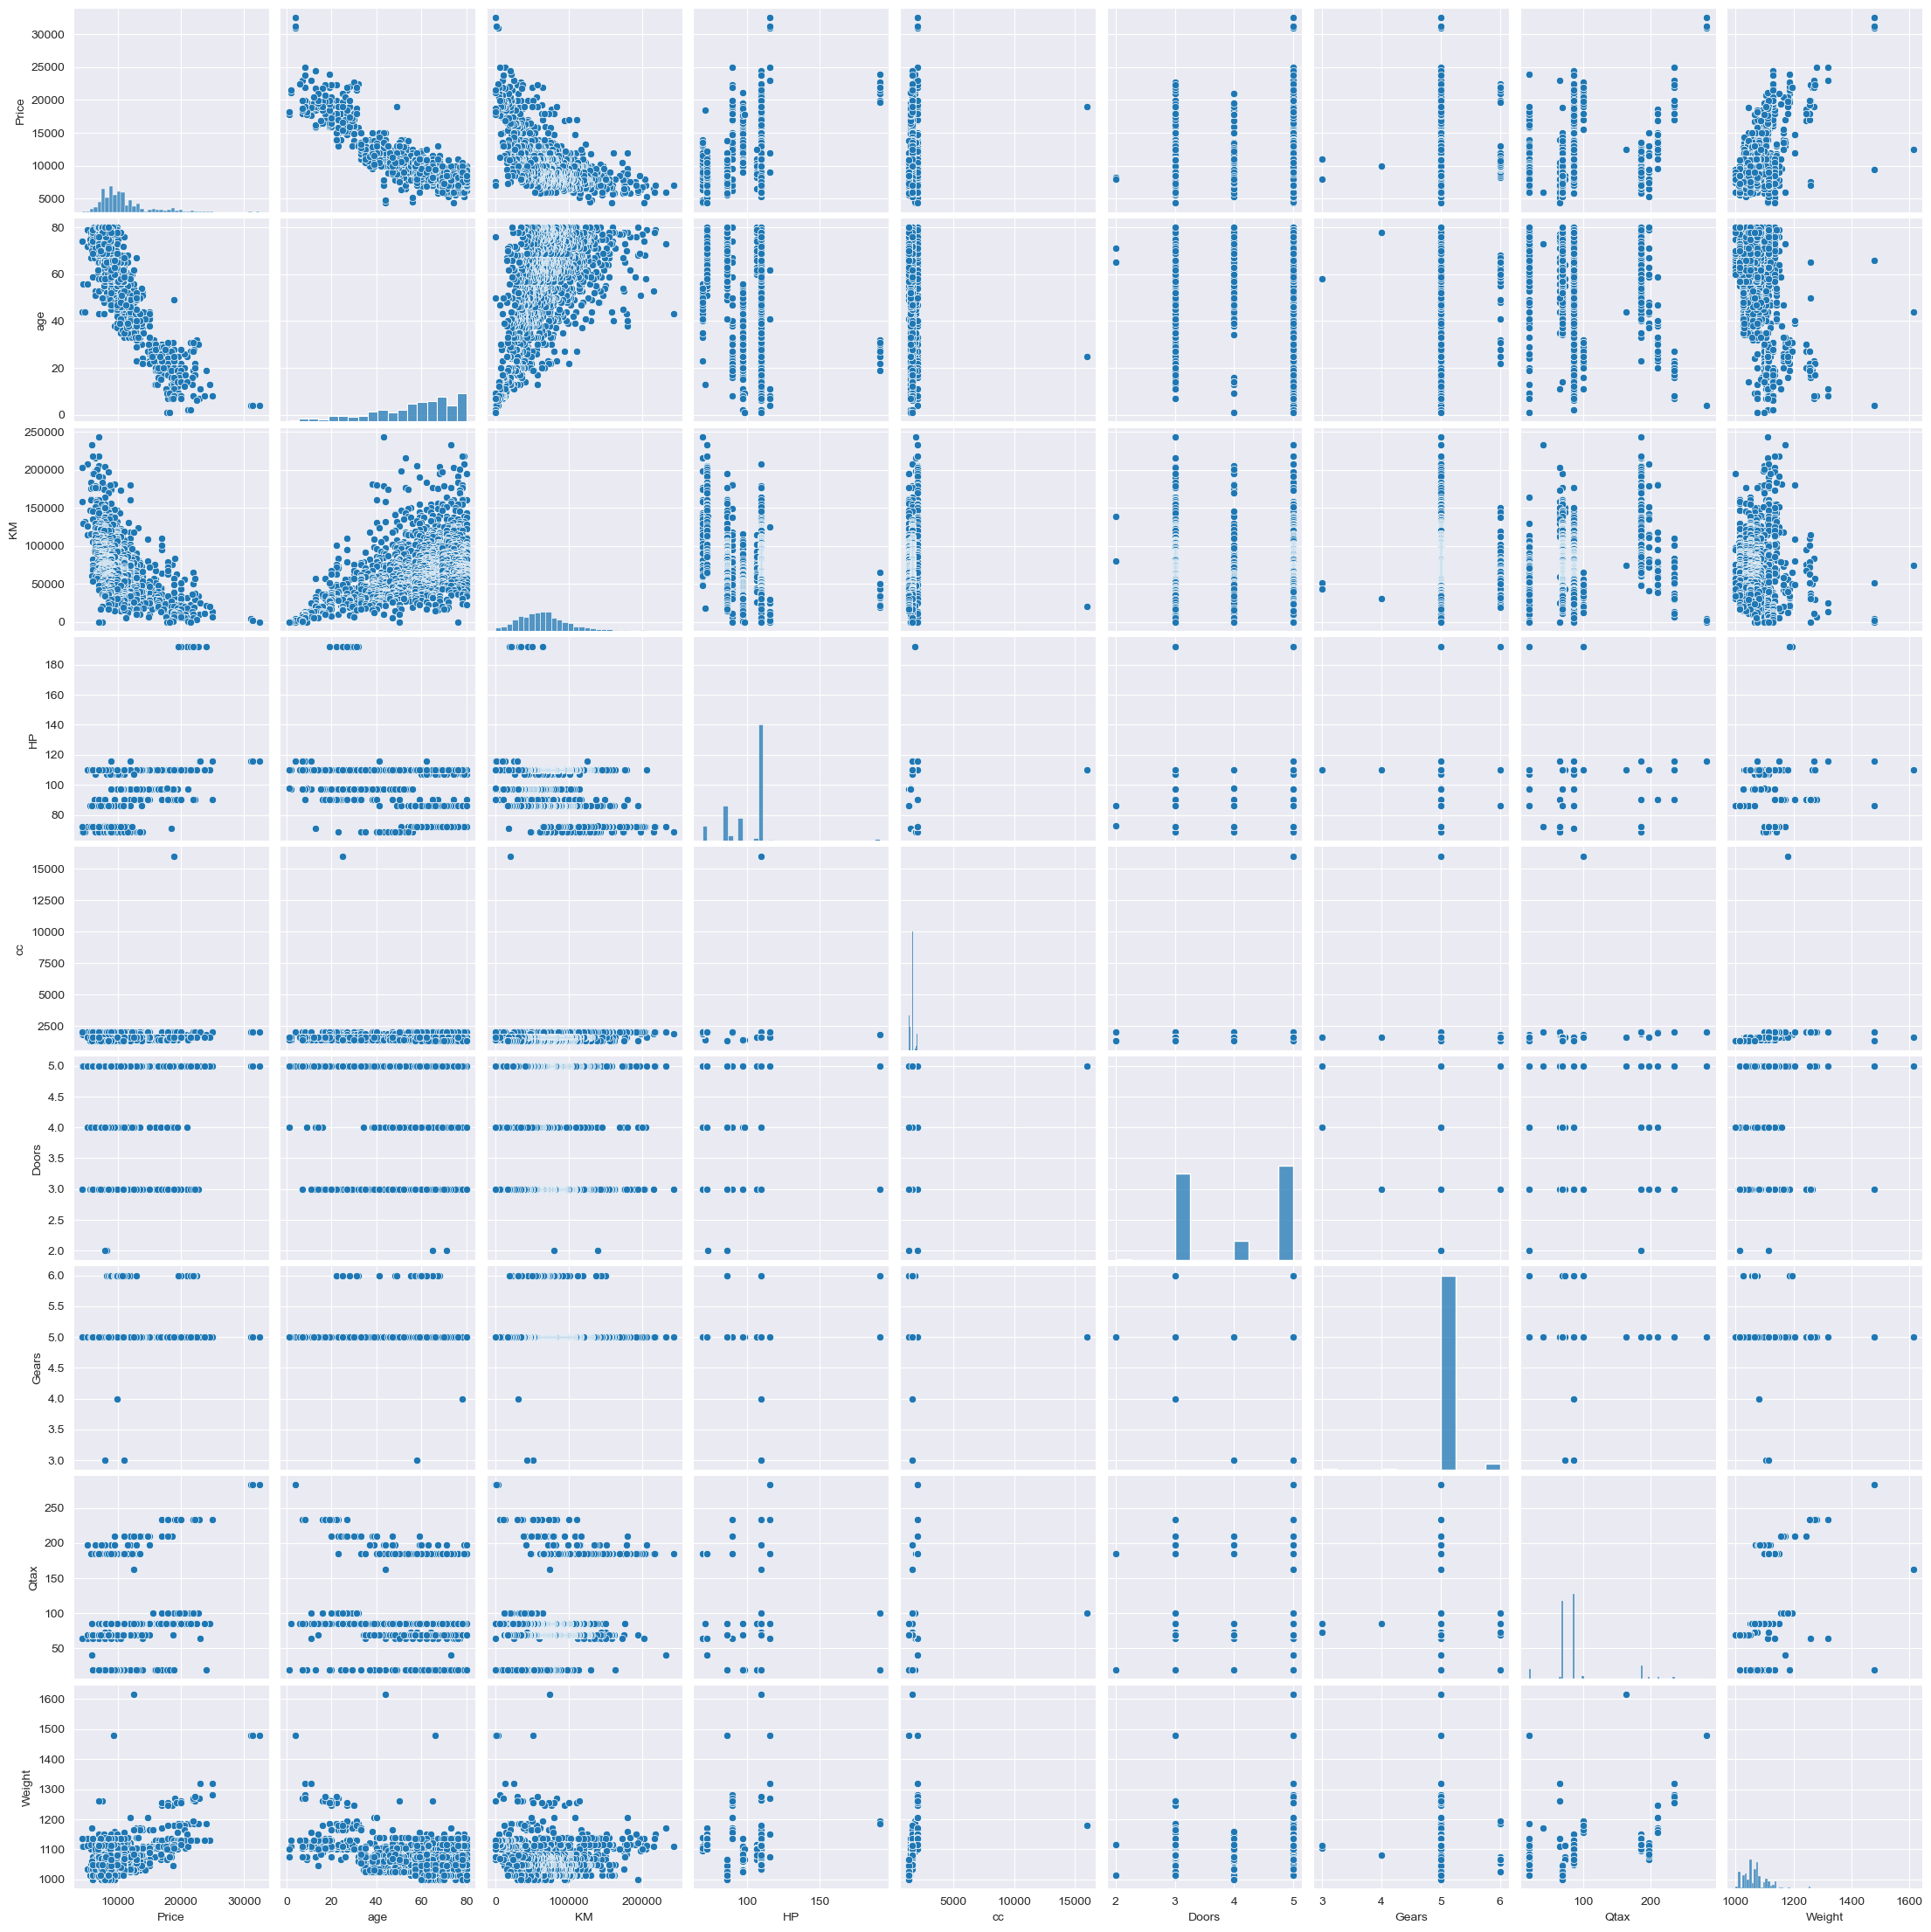

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(df3)

# <span style='color:royalblue'> Model1

In [15]:
model1=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Qtax+Weight',data=df3).fit()

In [16]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:06:43   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Qtax           3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test for normality of residuals (Q-Q Plot)

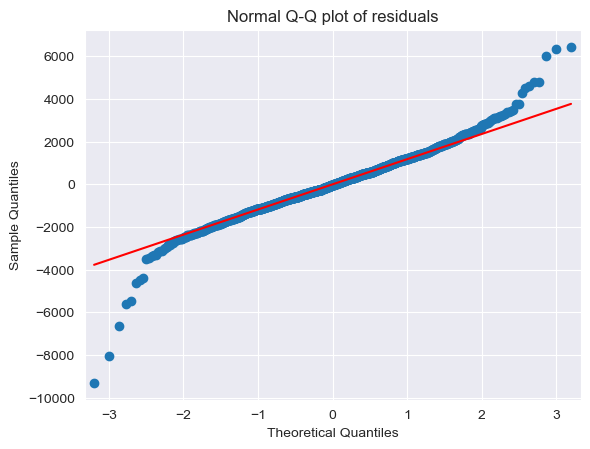

In [17]:
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [18]:
list(np.where(model1.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959])]

In [19]:
list(np.where(model1.resid>4000))

[array([ 109,  110,  111,  124,  146,  170,  522, 1057])]

In [20]:
df4=df3.drop(df3.index[[190, 191, 220, 392, 401, 600, 653, 959,109,  110,  111,  124,  146,  170,  522, 1057]],axis=0).reset_index()

In [21]:
df4.shape

(1419, 10)

# <span style='color:royalblue'> Model2

In [22]:
model2=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Qtax+Weight',data=df4).fit()

In [23]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1325.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:06:43   Log-Likelihood:                -12042.
No. Observations:                1419   AIC:                         2.410e+04
Df Residuals:                    1410   BIC:                         2.415e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.281e+04   1458.915     -8.779      0.000   -1.57e+04   -9946.344
age         -114.9859      2.417    -47.568      0.000    -119.728    -110.244
KM            -0.0200      0.001    -17.773      0.000      -0.022      -0.018
HP            20.8295      2.586      8.054      0.000      15.756      25.903
cc            -0.1586      0.080     -1.981      0.048      -0.316      -0.002
Doors        -73.5254     36.164     -2.033      0.042    -144.467      -2.584
Gears        649.4229    172.976      3.754      0.000     310.105     988.741
Qtax          -4.2058      1.298     -3.240      0.001      -6.752      -1.659
Weight        25.0748      1.268     19.773      0.000      22.587      27.562
==============================================================================
Omnibus:                        5.850   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                6.526
Skew:                           0.082   Prob(JB):                       0.0383
Kurtosis:                       3.289   Cond. No.                     3.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

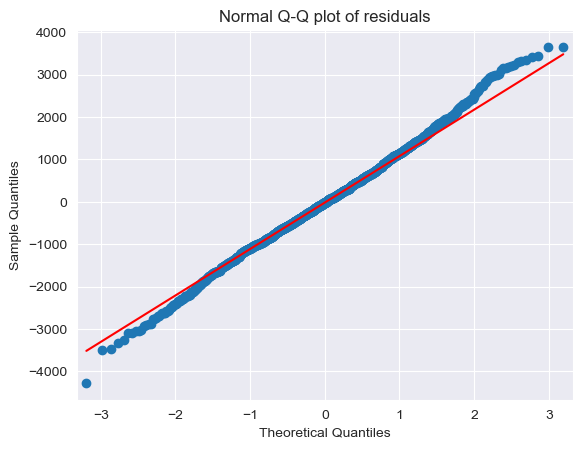

In [24]:
qqplot=sm.qqplot(model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [25]:
list(np.where(model2.resid<-4000))

[array([1418])]

In [26]:
list(np.where(model2.resid>3600))

[array([16, 74])]

In [27]:
df5=df4.drop(df4.index[[1418,16,74]])

In [28]:
df5.shape

(1416, 10)

# <span style='color:royalblue'>Model3

In [29]:
model3=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Qtax+Weight',data=df5).fit()

In [30]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1335.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:06:43   Log-Likelihood:                -12002.
No. Observations:                1416   AIC:                         2.402e+04
Df Residuals:                    1407   BIC:                         2.407e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.311e+04   1449.470     -9.044      0.000    -1.6e+04   -1.03e+04
age         -114.0490      2.403    -47.465      0.000    -118.762    -109.336
KM            -0.0203      0.001    -18.214      0.000      -0.022      -0.018
HP            19.0796      2.596      7.350      0.000      13.987      24.172
cc            -0.1518      0.079     -1.917      0.055      -0.307       0.004
Doors        -66.6412     35.871     -1.858      0.063    -137.007       3.725
Gears        684.8341    171.411      3.995      0.000     348.585    1021.083
Qtax          -4.6181      1.289     -3.582      0.000      -7.147      -2.089
Weight        25.3227      1.262     20.060      0.000      22.846      27.799
==============================================================================
Omnibus:                        4.012   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                4.093
Skew:                           0.085   Prob(JB):                        0.129
Kurtosis:                       3.201   Cond. No.                     3.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# <span style='color:royalblue'> Cook’s Distance

In [31]:
model3_influence = model3.get_influence()
(c, _) = model3_influence.cooks_distance

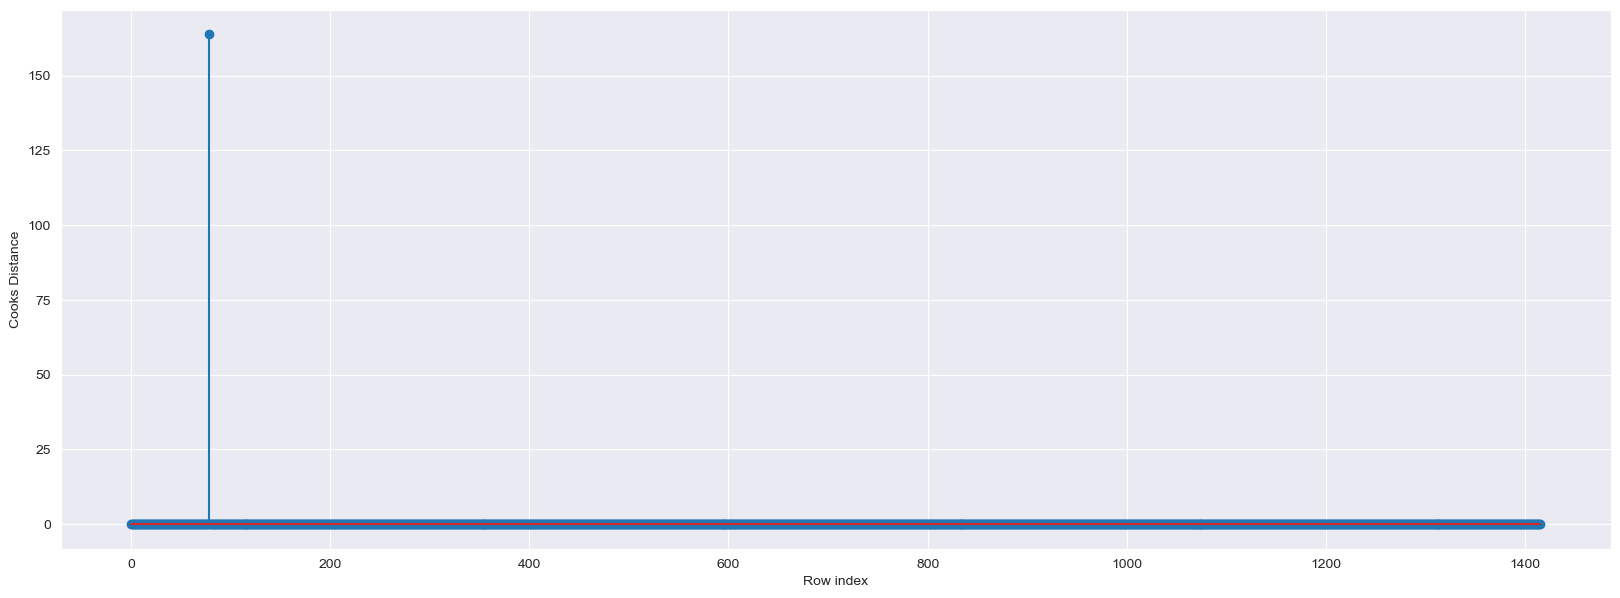

In [32]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
#index and value of outliers
(np.argmax(c),np.max(c))

(78, 163.82948070663065)

In [34]:
df6=df5.drop(df5.index[[78]],axis=0)

In [35]:
df6.shape

(1415, 10)

# <span style='color:royalblue'>Model4

In [36]:
model4=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Qtax+Weight',data=df6).fit()

In [37]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     1452.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:06:44   Log-Likelihood:                -11938.
No. Observations:                1415   AIC:                         2.389e+04
Df Residuals:                    1406   BIC:                         2.394e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.642e+04   1427.244    -11.504      0.000   -1.92e+04   -1.36e+04
age         -109.9161      2.342    -46.932      0.000    -114.510    -105.322
KM            -0.0173      0.001    -15.661      0.000      -0.019      -0.015
HP            28.2639      2.638     10.715      0.000      23.089      33.438
cc            -3.1803      0.292    -10.910      0.000      -3.752      -2.608
Doors       -128.2691     34.963     -3.669      0.000    -196.854     -59.684
Gears        562.7879    165.207      3.407      0.001     238.710     886.866
Qtax           0.8779      1.341      0.655      0.513      -1.752       3.508
Weight        31.9211      1.360     23.474      0.000      29.254      34.589
==============================================================================
Omnibus:                        7.669   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.101
Skew:                           0.132   Prob(JB):                       0.0174
Kurtosis:                       3.260   Cond. No.                     3.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
model4_influence = model4.get_influence()
(c, _) = model4_influence.cooks_distance

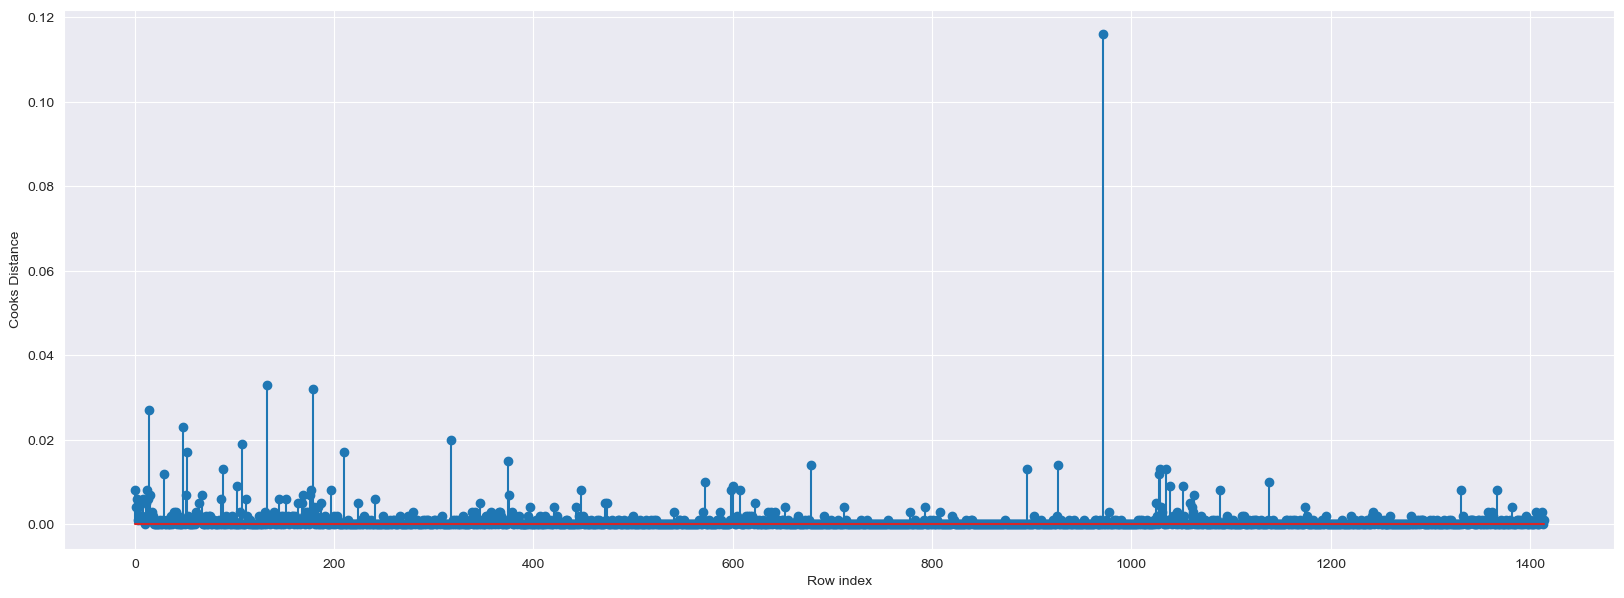

In [39]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df6)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [40]:
#index and value of outliers
(np.argmax(c),np.max(c))

(972, 0.11594417665007073)

In [41]:
df7=df6.drop(df6.index[[972]],axis=0)

In [42]:
df7.shape

(1414, 10)

# <span style='color:royalblue'>Model4

In [43]:
model5=smf.ols('Price~age+KM+HP+cc+Doors+Gears+Qtax+Weight',data=df7).fit()

In [44]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     1461.
Date:                Mon, 12 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:06:44   Log-Likelihood:                -11925.
No. Observations:                1414   AIC:                         2.387e+04
Df Residuals:                    1405   BIC:                         2.392e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.59e+04   1432.180    -11.105      0.000   -1.87e+04   -1.31e+04
age         -109.6125      2.337    -46.909      0.000    -114.196    -105.029
KM            -0.0173      0.001    -15.699      0.000      -0.019      -0.015
HP            28.8521      2.636     10.944      0.000      23.681      34.023
cc            -3.2110      0.291    -11.044      0.000      -3.781      -2.641
Doors       -137.6364     34.981     -3.935      0.000    -206.257     -69.016
Gears        398.0467    172.850      2.303      0.021      58.975     737.118
Qtax           0.8371      1.336      0.626      0.531      -1.785       3.459
Weight        32.2277      1.359     23.712      0.000      29.562      34.894
==============================================================================
Omnibus:                        8.304   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.685
Skew:                           0.145   Prob(JB):                       0.0130
Kurtosis:                       3.253   Cond. No.                     3.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
data = {'Model':['Model1','Model2','model3','model4','model5'],'R_Squared Value':(model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared)}

In [46]:
pd.DataFrame(data)

,Model,R_Squared Value
0,Model1,0.862520
1,Model2,0.882568
2,model3,0.883597
3,model4,0.892003
4,model5,0.892707


## Inference:

#### R-Squared value increased in final model, Therefore it states that the higher the R-Squared the better the model fits your data
#### Hence, the model 4 is better to predict the Price of the car.